#**Расчетное задание №4**

##Степанищев Степан, гр. 23171

Подключаем необходимые библиотеки

---



In [37]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Вводим данные, соответствующие V=6

---



In [38]:
V = 6

classCount = 2

N1 = 6
N2 = 4
N = N1 + N2

attr_1 = [40+V, 100-V, 30+V, 25+V, V, 100+V, 230-V, 110+V, 120+V, 180-V]
attr_2 = [10+V, 110-V, 20+V, 15+V, 105-V, 120+V, 220-V, 90+V, 200-V, 160-V]
target = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]

d = {'X1': attr_1, 'X2': attr_2, 'target': target}
full_df = pd.DataFrame(data=d)

Y=full_df['target']
X=full_df.drop(columns=['target'])
full_df.T

,0,1,2,3,4,5,6,7,8,9
X1,46,94,36,31,6,106,224,116,126,174
X2,16,104,26,21,99,126,214,96,194,154
target,1,1,1,1,1,1,2,2,2,2


Вычисляем средние для каждого класса

---



In [39]:
m1 = np.array(X[Y==1].mean())

m2 = np.array(X[Y==2].mean())

m1, m2

(array([53.16666667, 65.33333333]), array([160. , 164.5]))

Вычисляем общую матрицу разброса, чтобы потом найти 𝑊

---



In [40]:
def vec2mat(v):
  rows, cols = len(v), len(v)
  mat = np.zeros((rows, cols))
  for i in range(rows):
    for j in range(cols):
      mat[i][j] = v[i]*v[j]
  return mat

In [41]:
X = np.array(list(zip(X['X1'], X['X2'])))
Y = np.array(Y)

In [42]:
S1, S2 = np.zeros((classCount, classCount)), np.zeros((classCount, classCount))

for i in range(N1):
  S1 += vec2mat(X[i] - m1)

for i in range(N2):
  S2 += vec2mat(X[6 + i] - m2)

S = S1 + S2
S

array([[14904.83333333, 10239.66666667],
       [10239.66666667, 20378.33333333]])

Теперь можем вычислить 𝑊

---



In [44]:
w = np.linalg.inv(S).dot(m1 - m2)
w = w/np.linalg.norm(w, ord=2)

m = (N1*m1 + N2*m2)/N
w0 = w.dot(m)
w, w0

(array([-0.94943879, -0.3139522 ]), -124.01616095406143)

Рисуем

---


In [45]:
def plotW(ax, X):
  mp = max(max(X[0]), max(X[1])) + 10
  start = m - w*mp
  end = m + w*mp
  ax.plot([start[0], end[0]], [start[1], end[1]], c='orange')

In [46]:
def plotScatter(ax, X):
  ax.scatter(X[0, :N1], X[1, :N1], c='red')
  ax.scatter(X[0, N1:N], X[1, N1:N], c='blue')

In [47]:
def plotDivisor(ax, X):
  mp = max(max(X[0]), max(X[1])) + 10
  ort = np.array([w[1], -w[0]])
  start = m + ort*mp
  end = m - ort*mp
  ax.plot([start[0], end[0]], [start[1], end[1]], c='pink', linestyle='--')

In [48]:
def plotProjections(ax):
  for i in range(N):
    M = np.array([[w[1], -w[0]], [-w[0], -w[1]]])
    v = np.array([w[1]*m[0] - w[0]*m[1], -w[0]*X[0][i] - w[1]*X[1][i]])
    u = np.linalg.solve(M, v)
    ax.plot([X[0][i], u[0]], [X[1][i], u[1]], c='pink', linestyle='--')

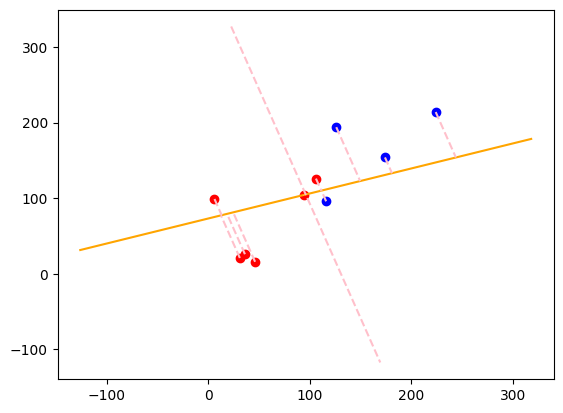

In [49]:
fig, ax = plt.subplots()

X = np.array(list(zip(*X)))
plotW(ax, X)
plotScatter(ax, X)
plotDivisor(ax, X)
plotProjections(ax)
X = np.array(list(zip(X[0], X[1])))

